## Data Exploration by Using Python 

In [1]:
import pandas as pd
import statistics as stat
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image  

In [2]:
# Get the current working directory
import os
os.getcwd()

'C:\\Users\\nsk_z\\Desktop'

In [3]:
# Change the working directory
os.chdir('/Users/nsk_z/OneDrive/Desktop/Data Science/2. Lazada Logistic Analysis by Python')
os.getcwd()

'C:\\Users\\nsk_z\\OneDrive\\Desktop\\Data Science\\2. Lazada Logistic Analysis by Python'

In [4]:
## Read the stroke dataset
log1 = pd.read_excel("NPS case study_Final.xlsx", "Dataset #1 - Buyer NPS")
log2 = pd.read_excel("NPS case study_Final.xlsx", "Dataset #2 - Verbatims")

In [5]:
## Explore the data
log1.head(10)

,NPS Month,Venture,Root Cause,Root Cause Level 2,3PL,Number of Promoter responses,Number of Detractor responses,Total number of responses,NPS score
0,2021-M07,SG,Delivery,Ability to find delivery status / Clarity of d...,3PL #A,10,0,10,1.000000
1,2021-M07,SG,Delivery,Ability to find delivery status / Clarity of d...,3PL #B,5,0,5,1.000000
2,2021-M07,SG,Delivery,Ability to find delivery status / Clarity of d...,3PL #D,0,0,0,0.000000
3,2021-M07,SG,Delivery,Accuracy of estimated delivery date,3PL #A,35,10,45,0.555556
4,2021-M07,SG,Delivery,Accuracy of estimated delivery date,3PL #B,5,5,10,0.000000
5,2021-M07,SG,Delivery,Accuracy of estimated delivery date,3PL #C,5,0,5,1.000000
6,2021-M07,SG,Delivery,Accuracy of estimated delivery date,3PL #D,5,5,10,0.000000
7,2021-M07,SG,Delivery,Attitude of courier/ Service quality of courier,3PL #A,15,5,20,0.500000
8,2021-M07,SG,Delivery,Attitude of courier/ Service quality of courier,3PL #B,0,0,0,0.000000
9,2021-M07,SG,Delivery,Attitude of courier/ Service quality of courier,3PL #C,5,0,5,1.000000


In [6]:
## Explore the data
log2.head(10)

,nps_submitted_month,venture,NPS rating,root_cause,root_cause_lvl_2,verbatim_root_cause
0,2021-M07,SG,Detractor,Delivery,Attitude of courier/ Service quality of courier,Delivery man is great at my area! Keep up with...
1,2021-M07,SG,Neutral,Delivery,Accuracy of estimated delivery date,I got message that item will be delivered toda...
2,2021-M07,SG,Detractor,Delivery,Attitude of courier/ Service quality of courier,Nothing to improve. I am happy!
3,2021-M07,SG,Detractor,Delivery,Timeliness of delivery notifications / Quality...,My order was updated to delivered but I haven'...
4,2021-M07,SG,Detractor,Delivery,Convenience of delivery service,We cannot arrange delivery time. Delivery man ...
5,2021-M07,SG,Neutral,Delivery,Ability to find delivery status / Clarity of d...,Should be able to track parcel during delivery...
6,2021-M07,SG,Neutral,Delivery,Attitude of courier/ Service quality of courier,Delivery man of 3PL #A is very rude! Took phot...
7,2021-M07,SG,Detractor,Delivery,Accuracy of estimated delivery date,Please send me notifications if an order is in...
8,2021-M07,SG,Detractor,Delivery,Whether items were received as ordered/ Items ...,I still haven't received my order even though...
9,2021-M08,SG,Neutral,Delivery,Speed of delivery,It would be nice to be able to choose the cour...


<AxesSubplot:title={'center':'Total Responses by Rootcause Level 2'}, ylabel='Root Cause Level 2'>

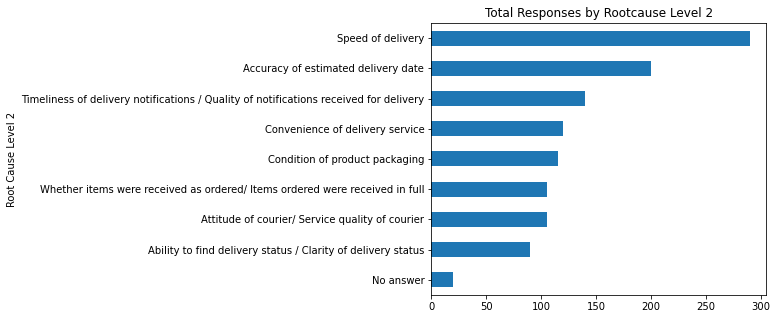

In [7]:
## Calculate total responses for Rootcause Level 2
df1 = log1.groupby(by="Root Cause Level 2")["Total number of responses"].sum().sort_values(ascending=True)
df1.plot(kind='barh', title = 'Total Responses by Rootcause Level 2', ylabel='Total Response',
        xlabel='Root Cause Level 2', figsize=(6,5))

<AxesSubplot:title={'center':'Avg NPS score by Rootcause Level 2'}, ylabel='Root Cause Level 2'>

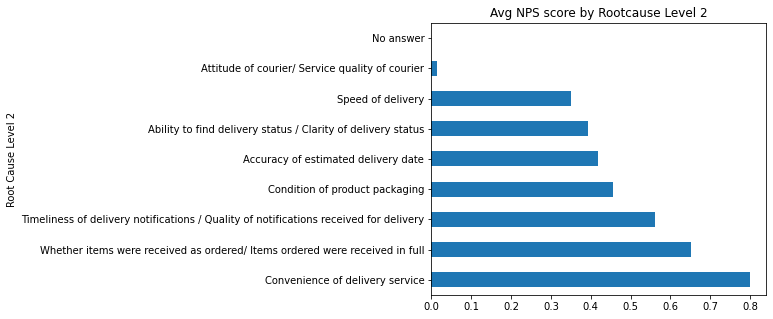

In [8]:
## Calculate Average NPS score for Rootcause Level 2
df1 = log1.groupby(by="Root Cause Level 2")["NPS score"].mean().sort_values(ascending=False)
df1.plot(kind='barh', title = 'Avg NPS score by Rootcause Level 2', ylabel='Avg NPS Score',
        xlabel='Root Cause Level 2', figsize=(6,5))

**It will focus on top 3 root cause for improvement:**
**1. Speed of delivery(low AVG NPS score, high total response)**
**2. Attitude of courier/service quality of courier(Very low AVG NPS scores although total responses consider less)**
**3. Accuracy of estimated delivery date(low AVG NPS score, high total response)**

### Performance by each 3PL

<AxesSubplot:title={'center':'Avg NPS score by 3PL'}, xlabel='3PL', ylabel='Avg NPS Score'>

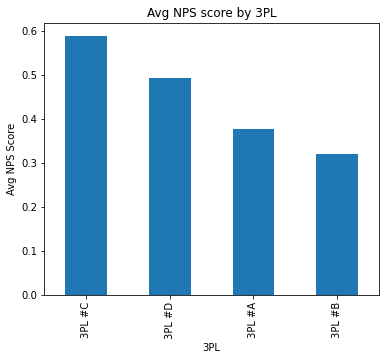

In [9]:
## Check the performance for each 3PL
df1 = log1.groupby(by="3PL")["NPS score"].mean().sort_values(ascending=False)
df1.plot(kind='bar', title = "Avg NPS score by 3PL", ylabel = 'Avg NPS Score',
        xlabel='3PL', figsize=(6,5))

***3PL #A and 3PL #B have the lower performance***

<AxesSubplot:title={'center':'AVG NPS score by Root Cause Level 2 of 3PL #B'}, ylabel='Root Cause Level 2'>

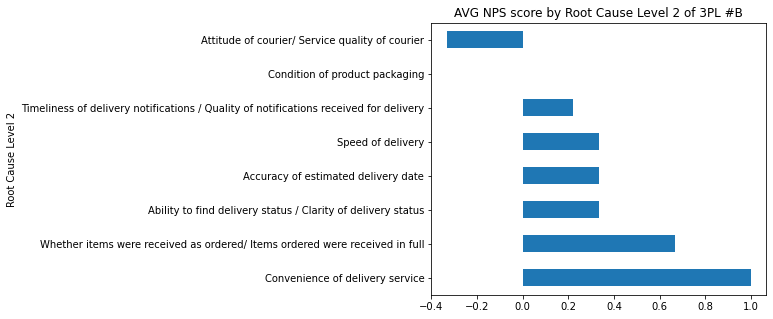

In [10]:
## Check the performance for 3PL #B
df_b = log1[log1['3PL'] == '3PL #B']
df1 = df_b.groupby(by="Root Cause Level 2")["NPS score"].mean().sort_values(ascending=False)
df1.plot(kind='barh', title = "AVG NPS score by Root Cause Level 2 of 3PL #B", ylabel = 'Avg NPS Score',
        xlabel='Root Cause Level 2', figsize=(6,5))

**Focus improvement on Attitude of Courier/Service quality of courier, Speed of delivery and Accuracy of estimated delivery date**

<AxesSubplot:title={'center':'AVG NPS score by Root Cause Level 2 of 3PL #A'}, ylabel='Root Cause Level 2'>

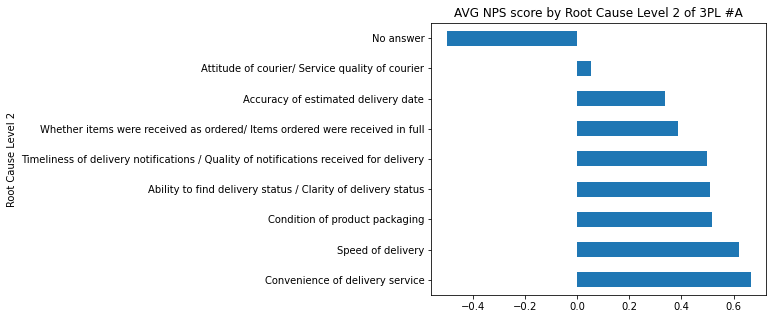

In [11]:
## Check the performance for 3PL #B
df_b = log1[log1['3PL'] == '3PL #A']
df1 = df_b.groupby(by="Root Cause Level 2")["NPS score"].mean().sort_values(ascending=False)
df1.plot(kind='barh', title = "AVG NPS score by Root Cause Level 2 of 3PL #A", ylabel = 'Avg NPS Score',
        xlabel='Root Cause Level 2', figsize=(6,5))

**Focus improvement on Attitude of Courier/Service quality of courier and Accuracy of estimated delivery data**

### Sentiment Analysis on the feedback

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nsk_z\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


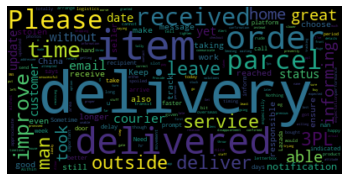

In [22]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud 
nltk.download('stopwords')
# Create stopword list:
stopwords = set(stopwords.words('english'))
stopwords.update(["br", "href"])
log2['verbatim_root_cause'] = log2['verbatim_root_cause'].astype(str)
textt = " ".join(review for review in log2.verbatim_root_cause)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

In [25]:
# assign NPS rating = Promoter as positive sentiment
# NPS rating = Detractor as negative sentiment
# Remove NPS rating = Neutral
log2 = log2[log2['NPS rating'] != 'Neutral']
log2['sentiment'] = log2['NPS rating'].apply(lambda rating : +1 if rating == 'Promotor' else -1)
log2.head()

,nps_submitted_month,venture,NPS rating,root_cause,root_cause_lvl_2,verbatim_root_cause,sentiment
0,2021-M07,SG,Detractor,Delivery,Attitude of courier/ Service quality of courier,Delivery man is great at my area! Keep up with...,-1
2,2021-M07,SG,Detractor,Delivery,Attitude of courier/ Service quality of courier,Nothing to improve. I am happy!,-1
3,2021-M07,SG,Detractor,Delivery,Timeliness of delivery notifications / Quality...,My order was updated to delivered but I haven'...,-1
4,2021-M07,SG,Detractor,Delivery,Convenience of delivery service,We cannot arrange delivery time. Delivery man ...,-1
7,2021-M07,SG,Detractor,Delivery,Accuracy of estimated delivery date,Please send me notifications if an order is in...,-1


In [26]:
## split df - positive and negative sentiment:
positive = log2[log2['sentiment'] == 1]
negative = log2[log2['sentiment'] == -1]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nsk_z\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


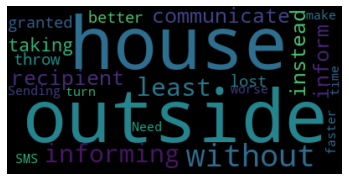

In [32]:
## Positive Sentiment
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud 
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))
stopwords.update(["br", "href","good","great","delivery","hand", "Items","left","please"]) 
## good and great removed because they were included in negative sentiment
pos = " ".join(review for review in positive.verbatim_root_cause)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nsk_z\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


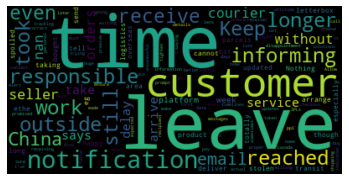

In [36]:
## Negative Sentiment
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud 
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))
stopwords.update(["br", "href","good","great","delivery","hand", "Items","left","please","delivered","order","received",
                  "parcel","item", "man","yet", "improve"]) 
## good and great removed because they were included in negative sentiment
neg = " ".join(review for review in negative.verbatim_root_cause)
wordcloud2 = WordCloud(stopwords=stopwords).generate(neg)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()